In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# LOAD THE DATA
train = pd.read_csv("C:/Users/rover/OneDrive/Escritorio/Computer_Vision/train_mnist.csv")
test = pd.read_csv("C:/Users/rover/OneDrive/Escritorio/Computer_Vision/test_mnist.csv")

# PREPARE DATA FOR NEURAL NETWORK
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)

In [2]:
model = keras.Sequential([
    Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)),
    MaxPool2D(),
    Dropout(0.4),
    Conv2D(64,kernel_size=5,activation='relu'),
    MaxPool2D(),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax'),
])


model.compile(optimizer="adam",
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# add the sperse
history = model.fit(
    X_train2,Y_train2,
    batch_size=80,
    validation_data=(X_val2,Y_val2),
    epochs=50,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=5),
    verbose=1
)


Epoch 1/50
420/420 [==============================] - 10s 3ms/step - loss: 0.4080 - accuracy: 0.8696 - val_loss: 0.0936 - val_accuracy: 0.9723
Epoch 2/50
420/420 [==============================] - 1s 3ms/step - loss: 0.1345 - accuracy: 0.9596 - val_loss: 0.0591 - val_accuracy: 0.9808
Epoch 3/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.9696 - val_loss: 0.0485 - val_accuracy: 0.9848
Epoch 4/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.0427 - val_accuracy: 0.9860
Epoch 5/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 6/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0621 - accuracy: 0.9801 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 7/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0344 - val_accuracy: 0.9883
Epoch

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

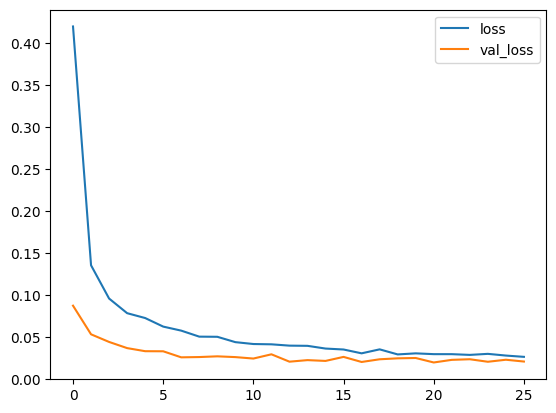

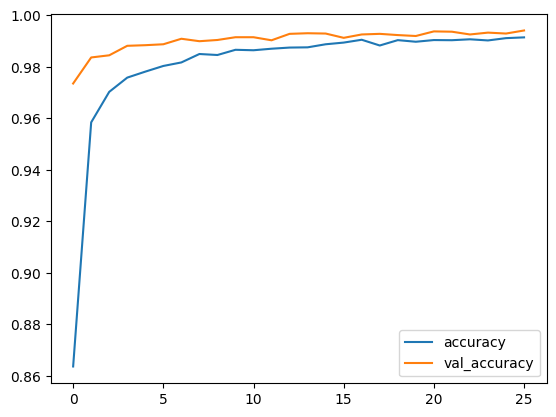

In [3]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

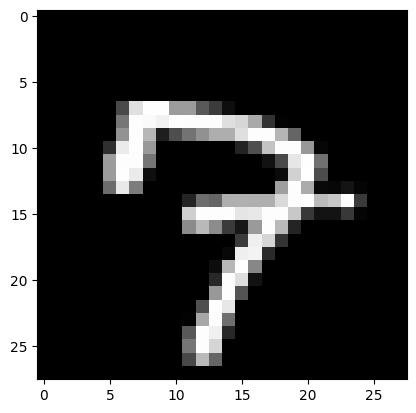

In [25]:
#to predict a single value
# x means the row for a specific number, for example 300
x = 5
data = np.matrix(test)
img = data[x].reshape(28,28)

# And displaying the image
plt.imshow(img, cmap="gray")

In [26]:
#Continuation to prediction of a single value
#Check if the output of this cell is the same as the image on top
pred = model.predict(X_test[x:x+1])
pred = list(pred.flatten())
y_pred_classes = np.argmax(pred)
y_pred_classes

7